# Feature Space

In [1]:
# Pyplot importieren
import matplotlib.pyplot as plt

# Seaborn importieren
import seaborn as sns

# Numpy importieren
import numpy as np

## Theorie

* Die Target Variable Y ist die Spalte, die wir einschätzen möchten
* Der Feature Space X ist eine Zahl von Spalten, genannt Feature, welche wir für diese Schätzung verwenden möchten.
  * Es wird oft $X=[x_1, x_2, ..., x_n]$ geschrieben, wobei jedes $x_i$ ein Feature ist.
  * Der Feature Space hat genau so viele Dimensionen wie Features

## Beispiel

Wir werden dieses Thema anhand eines Beispiels erarbeiten. Das Beispiel ist das "mpg" Datenset. Dieses Datenset enthält die Informationen zu der Reichweite, gemessen in "miles per gallon" mpg, sowie andere Merkmale von Autos aus den 1970ern.

Der Auftrag ist nun, die Reichweite eines unbekannten Autos anhand der anderen Informationen wie Zylinderzahl, Hubraum und so weiter einzuschätzen. Dies wäre zum Beispiel nützlich für den Designprozess eines neuen Autos, sodass man das Auto nicht erst bauen und testen muss.

In [2]:
df = sns.load_dataset("mpg")

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


Nun müssen wir entscheiden, anhand von welchen Spalten wir welche Spalten einschätzen möchten. Wie oben erwähnt ist das Ziel, die Reichweite einzuschätzen. Daher ist `mpg` unsere _Target Variable_ `Y`.

Nun wählen wir aus, anhand von welchen Spalten wir diese Schätzung machen. Da die Reichweite `mpg` hier unbekannt ist, können wir diese natürlich nicht verwenden. Sonst bräuchte es das Modell gar nicht. Grundsätzlich könnten wir alle anderen Spalten für die Schätzung verwenden, zur Übersicht verwenden wir nur `horsepower` und `weight`. Unser _Feature Space_ `X` ist hat also zwei Dimensionen. $x_1$ ist `horsepower`, $x_2$ ist `weight`.

Diese zwei Dimensionen kann man sich als Achsen im Koordinatensystem vorstellen:

<Axes: xlabel='horsepower', ylabel='weight'>

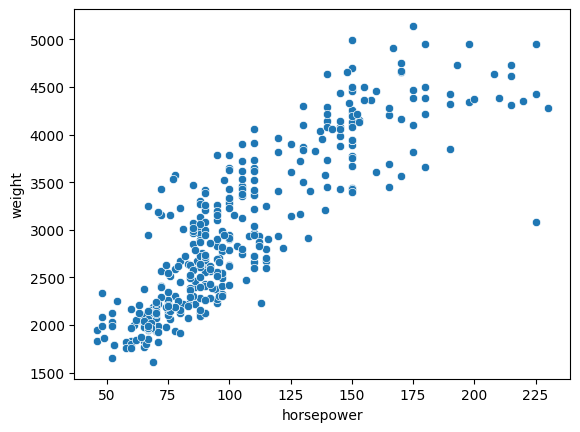

In [ ]:
sns.scatterplot(
    x=df['horsepower'],
    y=df['weight']
)

<Axes: xlabel='acceleration', ylabel='weight'>

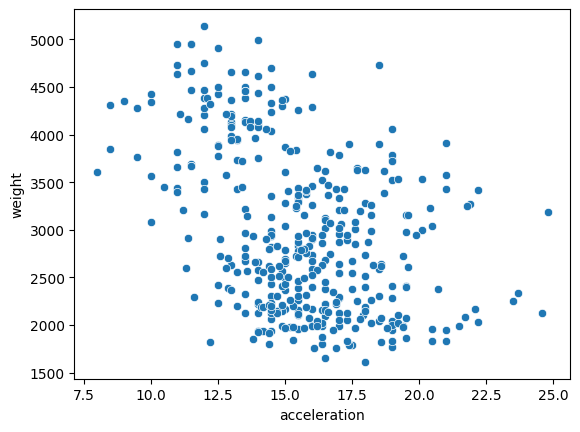

In [ ]:
sns.scatterplot(
    x=df['acceleration'],
    y=df['weight']
)

<Axes: xlabel='acceleration', ylabel='mpg'>

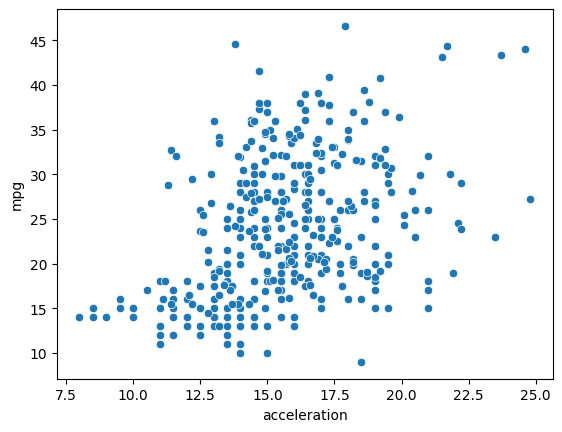

In [ ]:
sns.scatterplot(
    x=df['acceleration'],
    y=df['mpg']
)

<Axes: xlabel='weight', ylabel='mpg'>

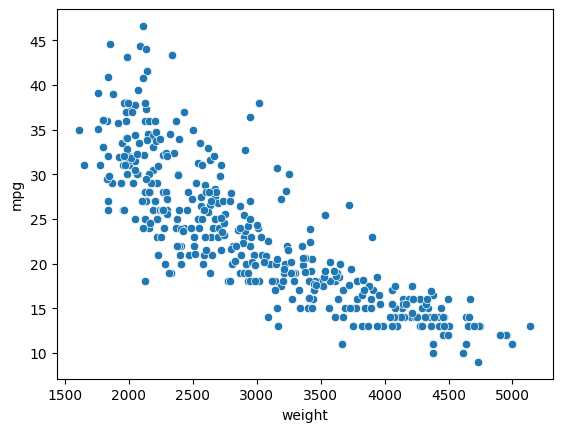

In [ ]:
sns.scatterplot(
    x=df['weight'],
    y=df['mpg']
)

<ipython-input-9-d3677940e114>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

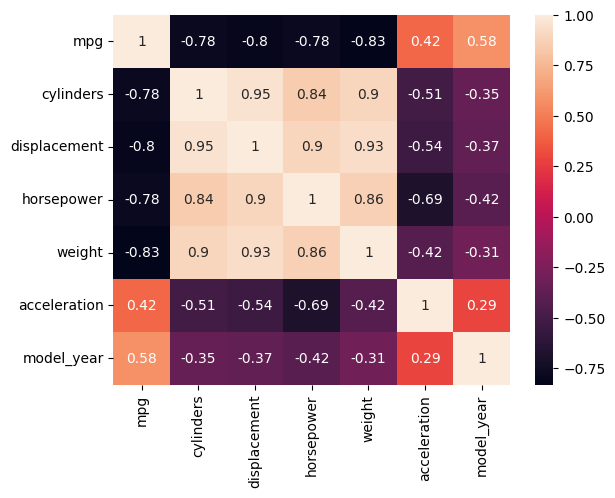

In [ ]:
import seaborn
correlation = df.corr()
seaborn.heatmap(correlation,annot=True)

Hier ist wichtig, die x,y-Achsen des Plots und das X und Y des Machine Learnings auseinander zu halten.

In [ ]:
# Aufteilung in X und Y
X = df[['horsepower', 'weight']]
Y = df['mpg']

In [ ]:
X.head()

,horsepower,weight
0,130.0,3504
1,165.0,3693
2,150.0,3436
3,150.0,3433
4,140.0,3449


In [ ]:
Y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

Wenn man nun die zwei Achsen von X und die eine Achse von Y kombiniert, sieht das wie folgt aus:

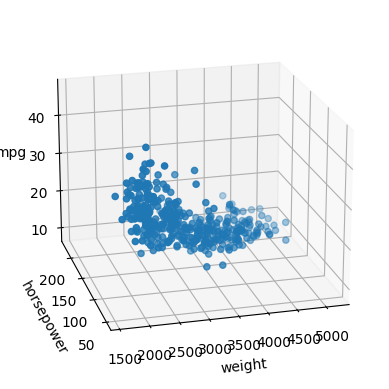

In [ ]:
# Projektion in 3D einstellen
ax = plt.axes(projection='3d')
# Plot zeichnen
ax.scatter3D(X['weight'], X['horsepower'], Y, )

# Achsen beschreiben
ax.set_xlabel('weight')
ax.set_ylabel('horsepower')
ax.set_zlabel('mpg')
# Rotation einstellen
ax.view_init(20, 255)
# Plot darstellen
plt.show()